In [1]:
import sys
sys.path.insert(0, "../src")

In [2]:
import pandas as pd

df = pd.read_csv("../data/Dahlen_2023.csv")
proj4string = "+proj=longlat +datum=WGS84 +no_defs"

In [5]:
import pandas as pd

def swap_xy_and_save(input_file: str, output_file: str) -> None:
    # Read the dataset
    df = pd.read_csv(input_file)
    
    # Check if 'x' and 'y' columns are present in the dataframe
    if 'x' not in df.columns or 'y' not in df.columns:
        raise ValueError("The input CSV file does not contain 'x' or 'y' columns.")
    
    # Swap the 'x' and 'y' columns
    df['x'], df['y'] = df['y'], df['x']
    
    # Write the dataset back to a new CSV file
    df.to_csv(output_file, index=False)

    print(f"File saved as {output_file}")

# Use the function with the filename of your choice
input_csv = '../data/Solomon2_2023.csv'
output_csv = '../data/Solomon2_2023.csv'
swap_xy_and_save(input_csv, output_csv)


File saved as ../data/Solomon2_2023.csv


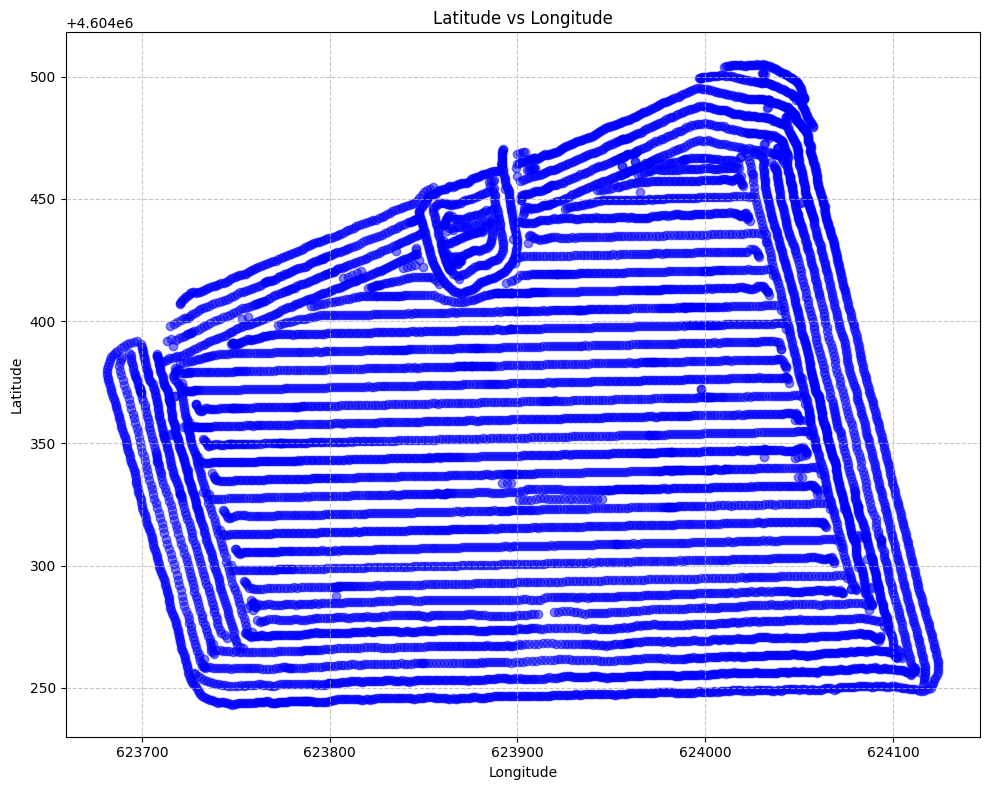

In [3]:
from ritas.viz import plot_coordinates

plot_coordinates(df);

In [4]:
from ritas.polygons import make_vehicle_polygons

geodf = make_vehicle_polygons(df, proj4string)

geodf.shape

INFO:root:Converting to UTM...
INFO:root:Running make_bounding_box...


(10208, 22)

In [ ]:
from ritas.viz import plot_map

_ = plot_map(geodf, fname = "uiowa")

In [6]:
from ritas.polygons import reshape_polygons

_geodf = reshape_polygons(geodf)

100%|██████████| 10207/10207 [00:32<00:00, 316.68it/s] 


INFO:root:Creating plot...


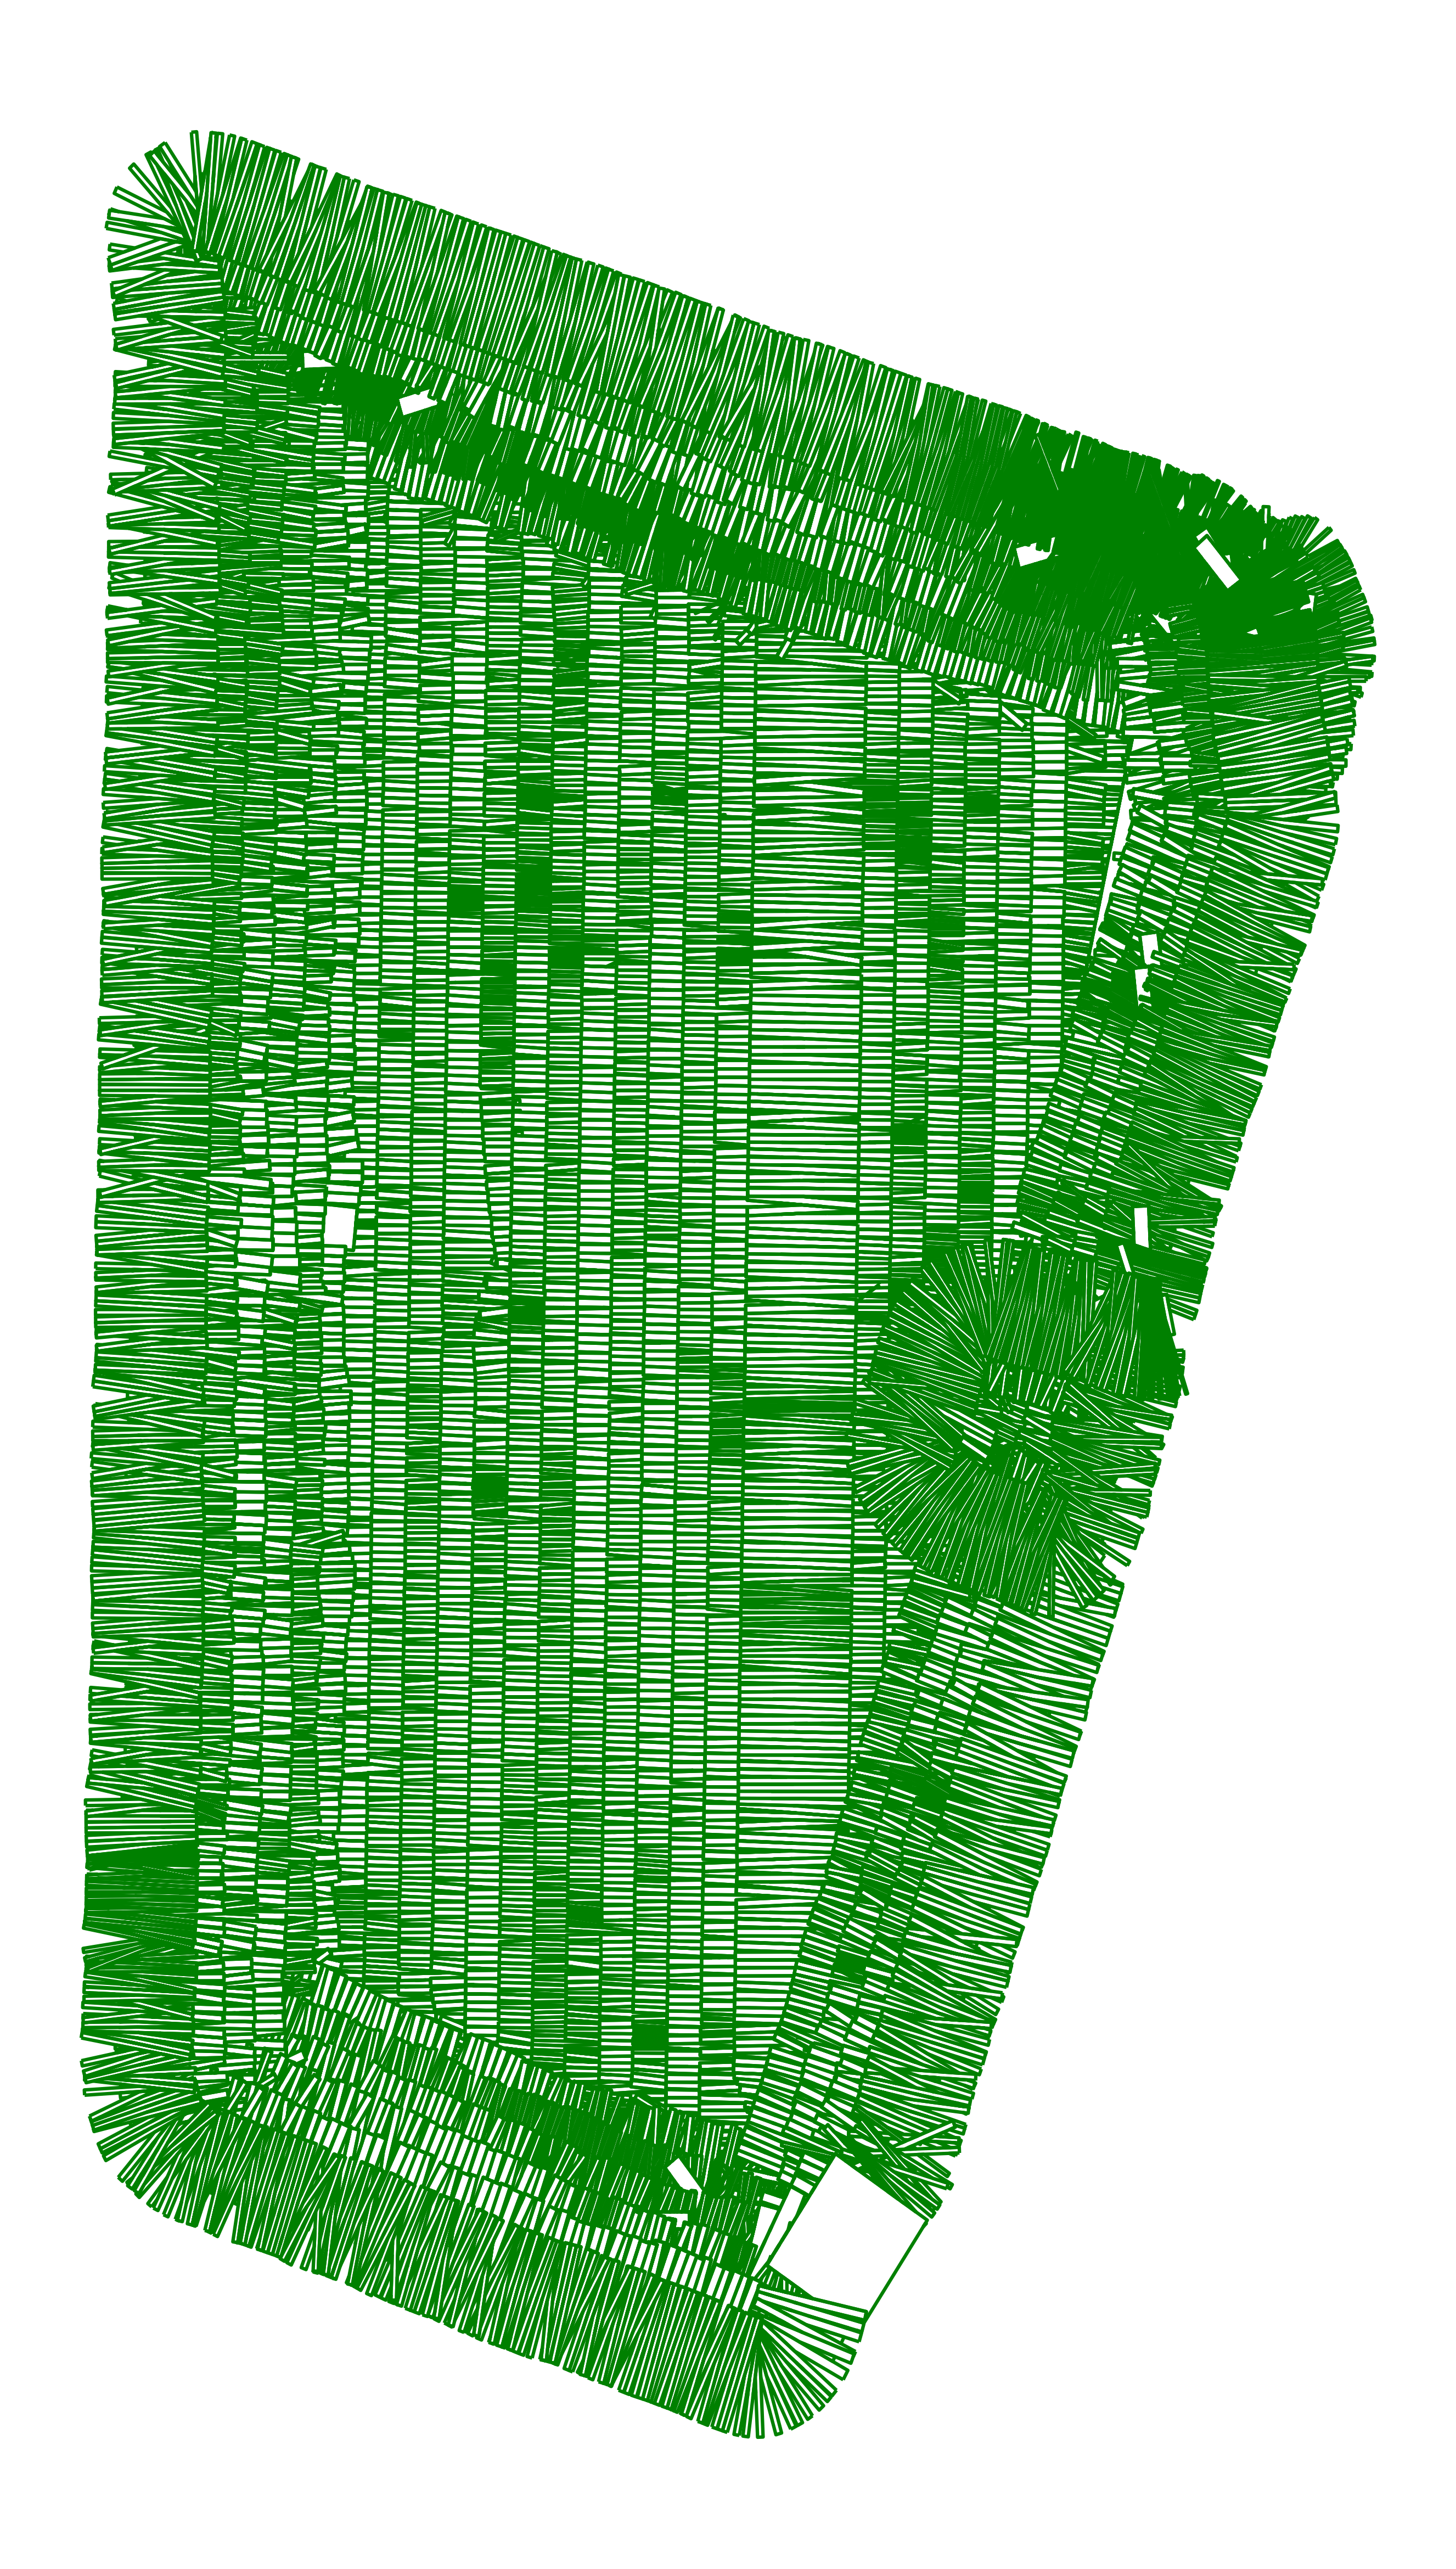

In [7]:
_ = plot_map(_geodf)